### Time Series Analysis in Python ###

Time series analysis simply means analysing data that changes over time. While we can apply many of the same techniques that we use to analyse other data-types to time series data, there are some other concepts and techniques that we need to learn.

In [1]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
%matplotlib inline

We will need a library to help us with dates and time when it comes to time series analysis.

In [2]:
import datetime

Datetime is a specific object that comes with a lot of convenience functions for dealing with (obviously) date and time.

In [3]:
datetime.datetime(2018, 12, 31)

datetime.datetime(2018, 12, 31, 0, 0)

Getting date/time from strings and converting date/time to strings

In [4]:
datetime.datetime.strptime('2018/12/31', '%Y/%m/%d')

datetime.datetime(2018, 12, 31, 0, 0)

In [5]:
datetime.datetime(2018, 12, 31).strftime('%Y/%m/%d')

'2018/12/31'

Date/time in Pandas

In [6]:
pd.to_datetime("21st of Jan, 2018, 10am")

Timestamp('2018-01-21 10:00:00')

In [7]:
pd.to_datetime("31/12/2018, 12pm")

Timestamp('2018-12-31 12:00:00')

In [8]:
# dayfirst to make clear what is the first number representing - day or month
pd.to_datetime("1/2/2018", dayfirst=True)

Timestamp('2018-02-01 00:00:00')

In [9]:
pd.to_datetime("1/2/2018", dayfirst=False)

Timestamp('2018-01-02 00:00:00')

Generating random time series data just means setting the index to a date/time series.

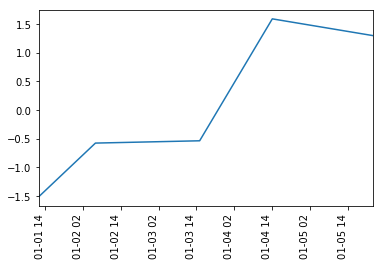

In [10]:
index = [pd.Timestamp("2018-01-01, 12pm"), 
         pd.Timestamp("2018-01-02, 6am"), 
         pd.Timestamp("2018-01-03, 3pm"),
         pd.Timestamp("2018-01-04, 2pm"),
         pd.Timestamp("2018-01-05, 10pm")]

ts = pd.Series(np.random.randn(len(index)), index=index)
ts.plot(rot=90)
plt.show()

In [11]:
ts.index

DatetimeIndex(['2018-01-01 12:00:00', '2018-01-02 06:00:00',
               '2018-01-03 15:00:00', '2018-01-04 14:00:00',
               '2018-01-05 22:00:00'],
              dtype='datetime64[ns]', freq=None)

There's no need to type out each of the dates/times. 

In [12]:
index = pd.to_datetime(["2018-01-01", "2018-01-02", "2018-01-03"])
ts_2 = pd.Series(np.random.randint(10,100, 3), index=index)

In [13]:
ts_2

2018-01-01    62
2018-01-02    49
2018-01-03    16
dtype: int64

We can just set the start time, and indicate the frequency desired.

In [14]:
pd.date_range(start="2017-01-01", periods=12, freq='M')

DatetimeIndex(['2017-01-31', '2017-02-28', '2017-03-31', '2017-04-30',
               '2017-05-31', '2017-06-30', '2017-07-31', '2017-08-31',
               '2017-09-30', '2017-10-31', '2017-11-30', '2017-12-31'],
              dtype='datetime64[ns]', freq='M')

Frequencies 
> B(business day), D(calendar day), W(weekly), M(month end), MS(month start), Q(quarter), A(annual), H(hourly), T(minutes), S(seconds), L(milliseconds), U(microseconds) 

Even a fairly arbitrary frequency is possible.

In [15]:
pd.date_range(start="2018-01-01", periods=5, freq='1D1h1min5s')

DatetimeIndex(['2018-01-01 00:00:00', '2018-01-02 01:01:05',
               '2018-01-03 02:02:10', '2018-01-04 03:03:15',
               '2018-01-05 04:04:20'],
              dtype='datetime64[ns]', freq='90065S')

In [16]:
# Merging two time series
s = pd.date_range(start="2018-01-01", periods=10, freq='D')
t = pd.date_range(start="2018-01-01", periods=10, freq='W')
s.union(t)

DatetimeIndex(['2018-01-01', '2018-01-02', '2018-01-03', '2018-01-04',
               '2018-01-05', '2018-01-06', '2018-01-07', '2018-01-08',
               '2018-01-09', '2018-01-10', '2018-01-14', '2018-01-21',
               '2018-01-28', '2018-02-04', '2018-02-11', '2018-02-18',
               '2018-02-25', '2018-03-04', '2018-03-11'],
              dtype='datetime64[ns]', freq=None)

Creating a random walk time series, which you will see looks like much of the financial data we see if fairly simple.

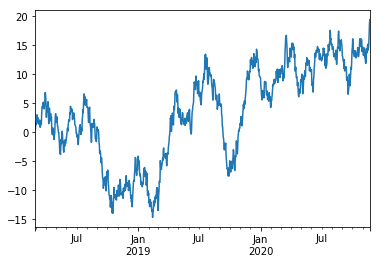

In [17]:
# Random walk time series
index = pd.date_range(start="2018-02-28", periods=1000, freq='D')
ts_random = pd.Series(np.random.randn(len(index)), index=index)
walk = ts_random.cumsum()
walk.plot(rot=0)
plt.show()

In [18]:
# Slicing and dicing as usual
ts_random['2018-03-01':'2018-03-10']

2018-03-01    0.777562
2018-03-02    0.413725
2018-03-03   -0.183474
2018-03-04    0.567550
2018-03-05    1.035431
2018-03-06   -1.390770
2018-03-07    0.937524
2018-03-08   -0.192736
2018-03-09   -0.225089
2018-03-10   -0.047632
Freq: D, dtype: float64

In [19]:
# Slicing by month
ts_random['2018-03']

2018-03-01    0.777562
2018-03-02    0.413725
2018-03-03   -0.183474
2018-03-04    0.567550
2018-03-05    1.035431
2018-03-06   -1.390770
2018-03-07    0.937524
2018-03-08   -0.192736
2018-03-09   -0.225089
2018-03-10   -0.047632
2018-03-11   -0.715712
2018-03-12   -0.027579
2018-03-13    0.757308
2018-03-14   -1.244572
2018-03-15    0.030548
2018-03-16    0.545781
2018-03-17    0.040858
2018-03-18   -0.076851
2018-03-19    1.821589
2018-03-20    1.015278
2018-03-21    0.263255
2018-03-22   -0.239495
2018-03-23    0.790515
2018-03-24    0.128060
2018-03-25   -0.598713
2018-03-26   -0.558370
2018-03-27    0.485098
2018-03-28    0.181652
2018-03-29    2.108756
2018-03-30    0.046867
2018-03-31   -0.715577
Freq: D, dtype: float64

In [20]:
# Shifting the values
ts_cut = ts_random['2018-03-01':'2018-03-10']
ts_cut

2018-03-01    0.777562
2018-03-02    0.413725
2018-03-03   -0.183474
2018-03-04    0.567550
2018-03-05    1.035431
2018-03-06   -1.390770
2018-03-07    0.937524
2018-03-08   -0.192736
2018-03-09   -0.225089
2018-03-10   -0.047632
Freq: D, dtype: float64

In [21]:
ts_cut.shift(3) # negative values shift backwards

2018-03-01         NaN
2018-03-02         NaN
2018-03-03         NaN
2018-03-04    0.777562
2018-03-05    0.413725
2018-03-06   -0.183474
2018-03-07    0.567550
2018-03-08    1.035431
2018-03-09   -1.390770
2018-03-10    0.937524
Freq: D, dtype: float64

We can also deal with ** time deltas **, i.e. differences expressed in time units quite easily.

In [22]:
pd.Timedelta(days=1) + pd.Timedelta(seconds=1)

Timedelta('1 days 00:00:01')

In [23]:
pd.to_timedelta('33.3s')

Timedelta('0 days 00:00:33.300000')

Creating a series of time deltas

In [24]:
pd.to_timedelta(np.arange(7), unit='D')

TimedeltaIndex(['0 days', '1 days', '2 days', '3 days', '4 days', '5 days',
                '6 days'],
               dtype='timedelta64[ns]', freq=None)

** Time Series Plotting **

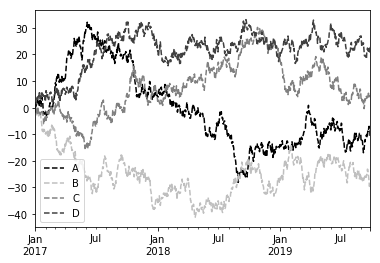

In [25]:
ts = pd.Series(np.random.randn(1000), index=pd.date_range('1/1/2017', periods=1000))
df = pd.DataFrame(np.random.randn(1000, 4), index=ts.index, columns=['A', 'B', 'C', 'D'])
df = df.cumsum()
df.plot(color=['k', '0.75', '0.5', '0.25'], ls='--')
plt.show()

Let's now use real data on the USDSGD exchange rate to show what we would typically do to process time series data.

In [26]:
SGD = pd.read_csv('SGD.csv')

We can see that the dates in this dataframe are simply strings now.

In [27]:
SGD.head(3)

,Date,Open,High,Low,Last,Ask High,Bid Low
0,01-07-04,1.7176,1.7188,1.7133,1.7148,NaN,1.7133
1,02-07-04,1.7146,1.7185,1.7108,1.7113,NaN,1.7108
2,05-07-04,1.7114,1.7185,1.7108,1.7155,NaN,1.7108


In [28]:
type(SGD.loc[0,'Date'])

str

Let's convert this to a datetime object and set it as the index.

In [29]:
SGD['Date'] = pd.to_datetime(SGD['Date'], format='%d-%m-%y')
SGD = SGD.set_index('Date')

In [30]:
SGD.head(3)

,Open,High,Low,Last,Ask High,Bid Low
Date,,,,,,
2004-07-01,1.7176,1.7188,1.7133,1.7148,NaN,1.7133
2004-07-02,1.7146,1.7185,1.7108,1.7113,NaN,1.7108
2004-07-05,1.7114,1.7185,1.7108,1.7155,NaN,1.7108


In [31]:
# The data that we have ranges  ...
print('From ', min(SGD.index), 'to ', max(SGD.index))

From  2004-07-01 00:00:00 to  2017-06-30 00:00:00


In [32]:
# Say we wanted to aggregate it by years
# One way of doing so is to create a column tagging them by years only

SGD['Year'] = SGD.index.strftime('%Y')

strftime means 'string format'. You can use it to format dates into a specific format. It's also useful, in this case for extracting a specific value from the date object. In this case '%Y' means the 4 digit year. You could also use '%y' for the two digit year, '%m' for the two digit month, '%d' for the 2 digit day and so on

In [33]:
SGD.head(3)

,Open,High,Low,Last,Ask High,Bid Low,Year
Date,,,,,,,
2004-07-01,1.7176,1.7188,1.7133,1.7148,NaN,1.7133,2004
2004-07-02,1.7146,1.7185,1.7108,1.7113,NaN,1.7108,2004
2004-07-05,1.7114,1.7185,1.7108,1.7155,NaN,1.7108,2004


In [34]:
# Now we can use the groupby function to get the annual means

AnnualSGD = SGD.copy()

In [35]:
AnnualSGD = AnnualSGD.groupby('Year').mean()

In [36]:
AnnualSGD.head(3)

,Open,High,Low,Last,Ask High,Bid Low
Year,,,,,,
2004,1.681427,1.684875,1.677962,1.680928,NaN,1.677962
2005,1.663944,1.667877,1.660310,1.664009,NaN,1.660310
2006,1.588692,1.592094,1.584906,1.588220,NaN,1.584906


To get the returns, think of the Pandas dataframe as a series of data that you can shift up and down for easy matrix and vector like operations.

Returns (in % terms) can be computed by taking -
> price(today) - price (x days ago)/price(x days ago)

In coding terms, this means that we can compute the 1 day (i.e. x = 1) day returns by taking a series from the Pandas dataframe as it is (at time t) and shifting it by 1 day.

If you just type 'Last', a key error will be returned. You might be scratching you head, wondering why. It's simply because there are two spaces here, before and after the word. I could have stripped out the spaces, but as this is an issue that one encounters quite often, useful to leave this here so you know how to troublesheet if you encounter this in other datasets. 

In [37]:
# First, let's look at the shift function
SGD[' Last '].head(3)

Date
2004-07-01    1.7148
2004-07-02    1.7113
2004-07-05    1.7155
Name:  Last , dtype: float64

In [38]:
# Shifted by 1 day. The price yesterday get's shifted to today.
SGD[' Last '].shift(1).head(5)

Date
2004-07-01       NaN
2004-07-02    1.7148
2004-07-05    1.7113
2004-07-06    1.7155
2004-07-07    1.7157
Name:  Last , dtype: float64

In [39]:
# With this, computing 1 days returns is trivial, and very very fast!
SGD['Returns'] = (SGD[' Last ']-SGD[' Last '].shift(1))/SGD[' Last '].shift(1)
SGD.head(3)

,Open,High,Low,Last,Ask High,Bid Low,Year,Returns
Date,,,,,,,,
2004-07-01,1.7176,1.7188,1.7133,1.7148,NaN,1.7133,2004,NaN
2004-07-02,1.7146,1.7185,1.7108,1.7113,NaN,1.7108,2004,-0.002041
2004-07-05,1.7114,1.7185,1.7108,1.7155,NaN,1.7108,2004,0.002454


In [40]:
# To doublecheck, let's manually compute a single datapoint - 
# the 1 day returns for 23 and 24 Aug 2016 (using the table above)

(1.7155 - 1.7113)/1.7113

0.0024542745281364935

In [41]:
# You could also do it without the use of the shift function by
# playing around with the indices
# Let's save the Pandas series into an array

close = np.array(SGD[' Last '])
close[:10]

array([ 1.7148,  1.7113,  1.7155,  1.7157,  1.7075,  1.707 ,  1.7016,
        1.6956,  1.7003,  1.7023])

In [42]:
# The trick now is to have one array that starts one day ahead [1:], 
# and one array that stops one day before the end [:-1]

returns = (close[1:] - close[:-1])/close[:-1]
returns[:10]

array([-0.00204105,  0.00245427,  0.00011658, -0.00477939, -0.00029283,
       -0.00316344, -0.00352609,  0.00277188,  0.00117626,  0.00281971])

Another commonly used metric is log returns. This is simply -
> $ Log Return = \frac{p_i}{p_i-1} $

In [43]:
# In python, this would be 

SGD['LogReturns'] = np.log(SGD[' Last ']/SGD[' Last '].shift(1))

In [44]:
SGD.head(3)

,Open,High,Low,Last,Ask High,Bid Low,Year,Returns,LogReturns
Date,,,,,,,,,
2004-07-01,1.7176,1.7188,1.7133,1.7148,NaN,1.7133,2004,NaN,NaN
2004-07-02,1.7146,1.7185,1.7108,1.7113,NaN,1.7108,2004,-0.002041,-0.002043
2004-07-05,1.7114,1.7185,1.7108,1.7155,NaN,1.7108,2004,0.002454,0.002451


Log Returns has a very useful property, which is that that returns over a shorter period can be summed together to get the returns over a longer period. For example, say we want the 5 day log returns. We can get that from the daily returns by summing them together.

In [45]:
SGD['5DayLogReturns'] = np.log(SGD[' Last ']/SGD[' Last '].shift(5))

In [46]:
SGD.head(6)

,Open,High,Low,Last,Ask High,Bid Low,Year,Returns,LogReturns,5DayLogReturns
Date,,,,,,,,,,
2004-07-01,1.7176,1.7188,1.7133,1.7148,NaN,1.7133,2004,NaN,NaN,NaN
2004-07-02,1.7146,1.7185,1.7108,1.7113,NaN,1.7108,2004,-0.002041,-0.002043,NaN
2004-07-05,1.7114,1.7185,1.7108,1.7155,NaN,1.7108,2004,0.002454,0.002451,NaN
2004-07-06,1.7166,1.7195,1.7125,1.7157,NaN,1.7125,2004,0.000117,0.000117,NaN
2004-07-07,1.7155,1.7162,1.7055,1.7075,NaN,1.7055,2004,-0.004779,-0.004791,NaN
2004-07-08,1.7068,1.7085,1.7048,1.7070,NaN,1.7048,2004,-0.000293,-0.000293,-0.004559


Sum the preceding 5 days worth of log returns and we will get the 5 day log returns we computed directly.

In [47]:
SGD[:6]['LogReturns'].sum()

-0.004559011929381697

** Merging time series by dates **

In [48]:
CNH = pd.read_csv('CNH.csv')

In [49]:
CNH.head(3)

,Date (GMT),Open,High,Low,Last,Ask High,Bid Low
0,01-10-10,6.618,6.6800,6.605,6.6050,6.7,6.605
1,04-10-10,6.605,6.6908,6.603,6.6115,6.7,6.603
2,05-10-10,6.610,6.6906,6.607,6.6906,6.7,6.607


In [50]:
CNH['Date'] = pd.to_datetime(CNH['Date (GMT)'], format='%d-%m-%y')
CNH = CNH.drop(['Date (GMT)'], axis=1)
CNH = CNH.set_index('Date')

In [51]:
CNH.head(3)

,Open,High,Low,Last,Ask High,Bid Low
Date,,,,,,
2010-10-01,6.618,6.6800,6.605,6.6050,6.7,6.605
2010-10-04,6.605,6.6908,6.603,6.6115,6.7,6.603
2010-10-05,6.610,6.6906,6.607,6.6906,6.7,6.607


In [52]:
# Recall SGD date range
# The data that we have ranges  ...
print('From ', min(SGD.index), 'to ', max(SGD.index))

From  2004-07-01 00:00:00 to  2017-06-30 00:00:00


In [53]:
# Now let's see CNH's date range
# The data that we have is lot more narrow  ...
print('From ', min(CNH.index), 'to ', max(CNH.index))

From  2010-10-01 00:00:00 to  2017-06-30 00:00:00


Very often, we will want to merge two datasets by their dates.

In [54]:
t_series = pd.merge(SGD, CNH, left_index=True, right_index=True)

In [55]:
# Inner join is the default
# indices are indicated as left_index and right_index = True
t_series.head()

,Open _x,High _x,Low _x,Last _x,Ask High,Bid Low,Year,Returns,LogReturns,5DayLogReturns,Open _y,High _y,Low _y,Last _y,Ask High,Bid Low
Date,,,,,,,,,,,,,,,,
2010-10-01,1.3145,1.3175,1.3108,1.3125,1.3183,1.3108,2010,-0.001370,-0.001370,-0.006758,6.618,6.6800,6.605,6.6050,6.700,6.605
2010-10-04,1.3117,1.3156,1.3104,1.3140,1.3167,1.3104,2010,0.001143,0.001142,-0.004556,6.605,6.6908,6.603,6.6115,6.700,6.603
2010-10-05,1.3145,1.3178,1.3081,1.3086,1.3188,1.3081,2010,-0.004110,-0.004118,-0.006778,6.610,6.6906,6.607,6.6906,6.700,6.607
2010-10-06,1.3090,1.3117,1.3064,1.3080,1.3127,1.3064,2010,-0.000459,-0.000459,-0.007464,6.595,6.6050,6.580,6.5800,6.615,6.580
2010-10-07,1.3076,1.3090,1.3034,1.3066,1.3101,1.3034,2010,-0.001070,-0.001071,-0.005876,6.575,6.5750,6.550,6.5630,6.595,6.550


In [56]:
# Outer join
t_series_outer = pd.merge(SGD, CNH, how='outer', left_index=True, right_index=True)

In [57]:
# Note the difference in length
len(t_series_outer), len(t_series)

(3392, 1761)

** Time Zones **

As time series can come from a range of sources, the time zones for different datasets might be different. So far, the datetime objects we were working with are not timezone aware.

In [58]:
t = SGD.index[0]

In [59]:
t.tz is None

True

A few ways to make our timestamps timezone-aware.

In [60]:
# Existing dataframes
t.tz_localize('Asia/Singapore')
t.tz is None

True

In [61]:
# New dataframes
t = pd.Timestamp('2017-01-01, 10am', tz='Asia/Singapore')
t.tz is None

False

In [62]:
import pytz
tz = pytz.timezone('Asia/Singapore')
rng = pd.date_range('1/1/2017 00:00', periods=10, freq='D', tz=tz)
rng

DatetimeIndex(['2017-01-01 00:00:00+08:00', '2017-01-02 00:00:00+08:00',
               '2017-01-03 00:00:00+08:00', '2017-01-04 00:00:00+08:00',
               '2017-01-05 00:00:00+08:00', '2017-01-06 00:00:00+08:00',
               '2017-01-07 00:00:00+08:00', '2017-01-08 00:00:00+08:00',
               '2017-01-09 00:00:00+08:00', '2017-01-10 00:00:00+08:00'],
              dtype='datetime64[ns, Asia/Singapore]', freq='D')

It's also possible to convert between timezones.

In [63]:
rng = pd.date_range('1/1/2017 00:00', periods=10, freq='D')
ts = pd.Series(np.random.randn(len(rng)), rng)
ts.index.tz is None

True

In [64]:
ts_utc = ts.tz_localize('UTC')
ts_utc.index.tz

<UTC>

In [65]:
ts_utc.tz_convert('Asia/Singapore').index.tz

<DstTzInfo 'Asia/Singapore' LMT+6:55:00 STD>

** Up and Down Sampling **

It's common to want to look at time series data at different time horizons. When we need higher frequency data (e.g. from months to days), we upsample, and when we need lower frequency data (e.g. from months to years), we downsample.

** Down Sampling **

Let's create a random dataset that is 600 minutes long (i.e. 10 hours), with a datapoint at each minute (i.e. frequency = T)

In [66]:
datetime_long = pd.date_range(start='2018-01-01', periods=600, freq='T')
ts_long = pd.Series(np.random.randn(len(datetime_long)), index=datetime_long)

In [67]:
ts_long.head(10)

2018-01-01 00:00:00   -0.012577
2018-01-01 00:01:00    0.016296
2018-01-01 00:02:00    0.493567
2018-01-01 00:03:00    1.478707
2018-01-01 00:04:00    0.705589
2018-01-01 00:05:00   -1.289139
2018-01-01 00:06:00   -0.515903
2018-01-01 00:07:00    0.727075
2018-01-01 00:08:00    2.496662
2018-01-01 00:09:00   -1.051974
Freq: T, dtype: float64

In [68]:
# resample by hour
print('# of hours:', len(ts_long.resample('60min').mean()))

# of hours: 10


In [69]:
ts_long.resample('60min').mean()

2018-01-01 00:00:00   -0.150229
2018-01-01 01:00:00   -0.013467
2018-01-01 02:00:00    0.033141
2018-01-01 03:00:00    0.085284
2018-01-01 04:00:00    0.078558
2018-01-01 05:00:00   -0.032913
2018-01-01 06:00:00   -0.259231
2018-01-01 07:00:00   -0.291667
2018-01-01 08:00:00   -0.121116
2018-01-01 09:00:00   -0.174889
Freq: 60T, dtype: float64

We can resample based on sum or any other function as well.

In [70]:
ts_long.resample('60min').sum()

2018-01-01 00:00:00    -9.013736
2018-01-01 01:00:00    -0.808015
2018-01-01 02:00:00     1.988480
2018-01-01 03:00:00     5.117056
2018-01-01 04:00:00     4.713457
2018-01-01 05:00:00    -1.974792
2018-01-01 06:00:00   -15.553865
2018-01-01 07:00:00   -17.500001
2018-01-01 08:00:00    -7.266958
2018-01-01 09:00:00   -10.493315
Freq: 60T, dtype: float64

Even the Open, High, Low, Close within a specified time period is possible.

In [71]:
ts_long.resample('60min').ohlc()

,open,high,low,close
2018-01-01 00:00:00,-0.012577,2.496662,-1.663505,0.486972
2018-01-01 01:00:00,-0.722748,2.921691,-3.515571,0.152024
2018-01-01 02:00:00,1.770474,2.213832,-2.134143,-0.314518
2018-01-01 03:00:00,-0.668625,2.543170,-2.324180,2.030725
2018-01-01 04:00:00,0.324577,2.373058,-2.010873,-1.411647
2018-01-01 05:00:00,0.144112,1.963429,-2.072134,1.146733
2018-01-01 06:00:00,0.575944,1.398898,-2.028591,-0.758015
2018-01-01 07:00:00,0.703683,1.966859,-2.596084,-0.235211
2018-01-01 08:00:00,-0.151082,2.596771,-2.664688,0.913425
2018-01-01 09:00:00,-0.038656,1.680943,-1.919036,0.551351


** Up Sampling **

In [72]:
datetime_short = pd.date_range(start='2017-01-01', periods=5, freq='W')
ts_short = pd.Series(np.random.randn(len(datetime_short)), index=datetime_short)

In [73]:
ts_short

2017-01-01    0.609543
2017-01-08    0.358023
2017-01-15   -0.600486
2017-01-22   -0.458635
2017-01-29    0.701522
Freq: W-SUN, dtype: float64

In [74]:
ts_short.resample('D').mean()

2017-01-01    0.609543
2017-01-02         NaN
2017-01-03         NaN
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-07         NaN
2017-01-08    0.358023
2017-01-09         NaN
2017-01-10         NaN
2017-01-11         NaN
2017-01-12         NaN
2017-01-13         NaN
2017-01-14         NaN
2017-01-15   -0.600486
2017-01-16         NaN
2017-01-17         NaN
2017-01-18         NaN
2017-01-19         NaN
2017-01-20         NaN
2017-01-21         NaN
2017-01-22   -0.458635
2017-01-23         NaN
2017-01-24         NaN
2017-01-25         NaN
2017-01-26         NaN
2017-01-27         NaN
2017-01-28         NaN
2017-01-29    0.701522
Freq: D, dtype: float64

In [75]:
ts_short.resample('D').ffill() #Can also backfill with bfill

2017-01-01    0.609543
2017-01-02    0.609543
2017-01-03    0.609543
2017-01-04    0.609543
2017-01-05    0.609543
2017-01-06    0.609543
2017-01-07    0.609543
2017-01-08    0.358023
2017-01-09    0.358023
2017-01-10    0.358023
2017-01-11    0.358023
2017-01-12    0.358023
2017-01-13    0.358023
2017-01-14    0.358023
2017-01-15   -0.600486
2017-01-16   -0.600486
2017-01-17   -0.600486
2017-01-18   -0.600486
2017-01-19   -0.600486
2017-01-20   -0.600486
2017-01-21   -0.600486
2017-01-22   -0.458635
2017-01-23   -0.458635
2017-01-24   -0.458635
2017-01-25   -0.458635
2017-01-26   -0.458635
2017-01-27   -0.458635
2017-01-28   -0.458635
2017-01-29    0.701522
Freq: D, dtype: float64

In [76]:
ts_short.resample('D').ffill(2) # limit number of fills

2017-01-01    0.609543
2017-01-02    0.609543
2017-01-03    0.609543
2017-01-04         NaN
2017-01-05         NaN
2017-01-06         NaN
2017-01-07         NaN
2017-01-08    0.358023
2017-01-09    0.358023
2017-01-10    0.358023
2017-01-11         NaN
2017-01-12         NaN
2017-01-13         NaN
2017-01-14         NaN
2017-01-15   -0.600486
2017-01-16   -0.600486
2017-01-17   -0.600486
2017-01-18         NaN
2017-01-19         NaN
2017-01-20         NaN
2017-01-21         NaN
2017-01-22   -0.458635
2017-01-23   -0.458635
2017-01-24   -0.458635
2017-01-25         NaN
2017-01-26         NaN
2017-01-27         NaN
2017-01-28         NaN
2017-01-29    0.701522
Freq: D, dtype: float64

In [77]:
ts_short.resample('D').interpolate() # linear interpolation

2017-01-01    0.609543
2017-01-02    0.573611
2017-01-03    0.537680
2017-01-04    0.501748
2017-01-05    0.465817
2017-01-06    0.429885
2017-01-07    0.393954
2017-01-08    0.358023
2017-01-09    0.221093
2017-01-10    0.084163
2017-01-11   -0.052767
2017-01-12   -0.189696
2017-01-13   -0.326626
2017-01-14   -0.463556
2017-01-15   -0.600486
2017-01-16   -0.580221
2017-01-17   -0.559957
2017-01-18   -0.539692
2017-01-19   -0.519428
2017-01-20   -0.499164
2017-01-21   -0.478899
2017-01-22   -0.458635
2017-01-23   -0.292898
2017-01-24   -0.127161
2017-01-25    0.038575
2017-01-26    0.204312
2017-01-27    0.370048
2017-01-28    0.535785
2017-01-29    0.701522
Freq: D, dtype: float64